<a href="https://colab.research.google.com/github/ggomez31/ML-Assignments/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
import io

In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

total_bedrooms column contains missing values.

In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10320 non-null  int64  
 1   longitude           10320 non-null  float64
 2   latitude            10320 non-null  float64
 3   housing_median_age  10320 non-null  float64
 4   total_rooms         10320 non-null  float64
 5   total_bedrooms      10210 non-null  float64
 6   population          10320 non-null  float64
 7   households          10320 non-null  float64
 8   median_income       10320 non-null  float64
 9   ocean_proximity     10320 non-null  object 
 10  median_house_value  10320 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 887.0+ KB


In [ ]:
trainData.describe()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,10210.000000,10320.000000,10320.000000,10320.000000,10320.000000
mean,5159.500000,-119.593791,35.647997,28.544477,2652.874031,541.297845,1431.618120,502.993605,3.882051,208222.779845
std,2979.271723,2.005209,2.132319,12.605356,2215.969393,427.866565,1144.035957,388.016806,1.902330,116152.666840
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,14999.000000
25%,2579.750000,-121.810000,33.940000,18.000000,1461.000000,294.250000,786.000000,278.000000,2.583300,120000.000000
50%,5159.500000,-118.535000,34.270000,29.000000,2138.000000,438.000000,1165.000000,413.000000,3.550000,180700.000000
75%,7739.250000,-118.010000,37.720000,37.000000,3144.250000,648.750000,1724.000000,607.000000,4.733575,267225.000000
max,10319.000000,-114.550000,41.920000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


Viewing the distribution of our target vector.

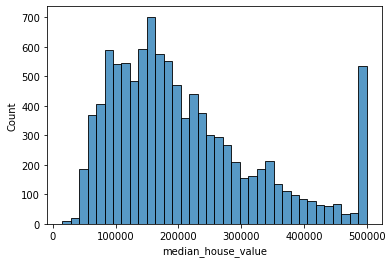

In [ ]:
sns.histplot(trainData.median_house_value)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


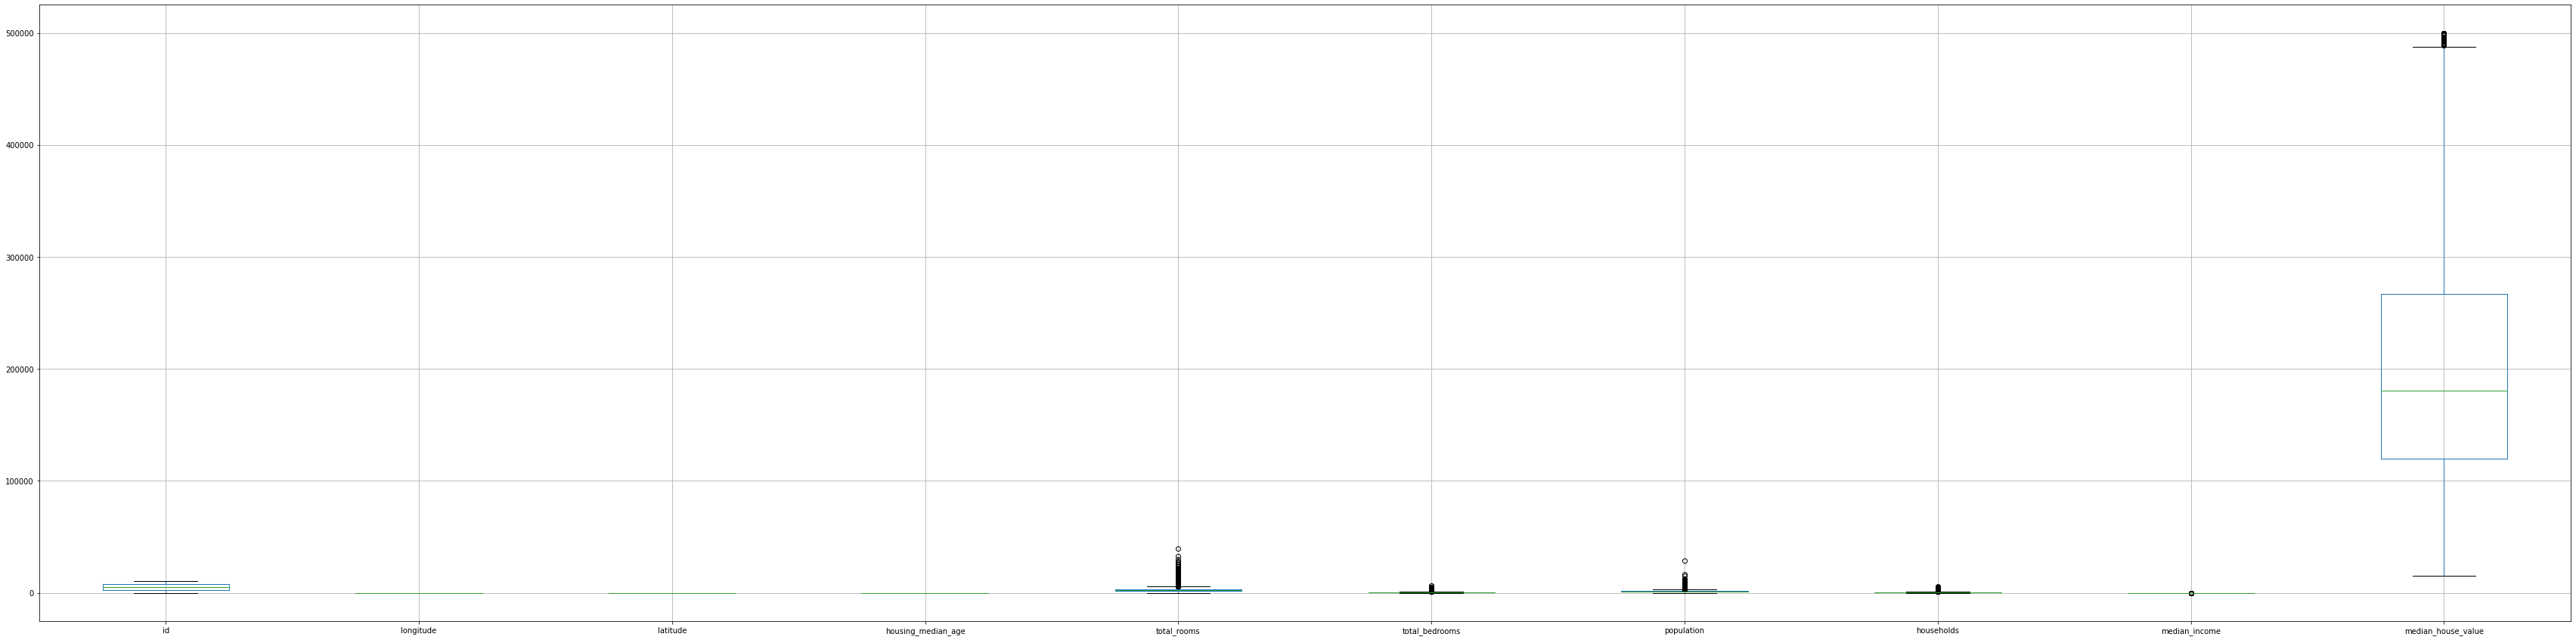

In [ ]:
trainData.boxplot(figsize=(60,15))
plt.show()

In [ ]:
print(trainData['ocean_proximity'].value_counts())

<1H OCEAN     4566
INLAND        3248
NEAR OCEAN    1329
NEAR BAY      1175
ISLAND           2
Name: ocean_proximity, dtype: int64


In [ ]:
dummy_list = ["ocean_proximity"]

In [ ]:
def dummify(df, dummy_list):
    for x in dummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x,1)
        df = pd.concat([df,dummies], axis=1)
    return df

In [ ]:
trainData = dummify(trainData, dummy_list)

In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          10320 non-null  int64  
 1   longitude                   10320 non-null  float64
 2   latitude                    10320 non-null  float64
 3   housing_median_age          10320 non-null  float64
 4   total_rooms                 10320 non-null  float64
 5   total_bedrooms              10210 non-null  float64
 6   population                  10320 non-null  float64
 7   households                  10320 non-null  float64
 8   median_income               10320 non-null  float64
 9   median_house_value          10320 non-null  float64
 10  ocean_proximity_<1H OCEAN   10320 non-null  uint8  
 11  ocean_proximity_INLAND      10320 non-null  uint8  
 12  ocean_proximity_ISLAND      10320 non-null  uint8  
 13  ocean_proximity_NEAR BAY    103

In [ ]:
def normalizeData(data):
  cols = ['longitude','latitude']
  for col in cols:
    data[col] = MinMaxScaler().fit_transform(np.array(data[col]).reshape(-1,1))
  return data

In [ ]:
def standardizeData(data):
  cols = ['longitude', 'latitude','total_rooms','total_bedrooms', 'population', 'households', 'median_income']
  for col in cols:
    data[col] = StandardScaler().fit_transform(np.array(data[col]).reshape(-1,1))
  return data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trainData.drop(trainData.columns[[0,9]], axis=1), trainData.median_house_value, test_size=0.33)

In [ ]:
X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna((X_train['total_bedrooms'].median()))
X_test['total_bedrooms'] = X_test['total_bedrooms'].fillna((X_test['total_bedrooms'].median()))
X_train = standardizeData(X_train)
X_test = standardizeData(X_test)
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,6.914000e+03,6.914000e+03,6914.000000,6.914000e+03,6.914000e+03,6.914000e+03,6.914000e+03,6.914000e+03,6914.000000,6914.000000,6914.000000,6914.000000,6914.000000
mean,-2.641477e-15,-1.095787e-15,28.578826,-5.819277e-17,-1.121463e-16,-4.508976e-17,7.797574e-17,-1.392516e-16,0.443882,0.314001,0.000145,0.115707,0.126266
std,1.000072e+00,1.000072e+00,12.646123,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,0.496877,0.464150,0.012026,0.319897,0.332172
min,-2.370682e+00,-1.462464e+00,1.000000,-1.229028e+00,-1.281560e+00,-1.247448e+00,-1.309527e+00,-1.782382e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.105858e+00,-8.074832e-01,18.000000,-5.428295e-01,-5.730443e-01,-5.606755e-01,-5.825520e-01,-6.774885e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.239164e-01,-6.484163e-01,28.000000,-2.278474e-01,-2.343979e-01,-2.296478e-01,-2.256495e-01,-1.658680e-01,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.888797e-01,9.609663e-01,37.000000,2.288355e-01,2.507551e-01,2.585076e-01,2.734872e-01,4.471388e-01,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.528639e+00,2.925910e+00,52.000000,1.408969e+01,1.419290e+01,2.396185e+01,1.470499e+01,5.899514e+00,1.000000,1.000000,1.000000,1.000000,1.000000


Training and predicting a Ridge regression model.

In [ ]:
reg = Ridge(alpha=0.01)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

68481.51378901432

In [ ]:
train_RMSE = []

test_RMSE = []

for i in range(200):
  X_train_loop, X_test_loop, y_train_loop, y_test_loop = train_test_split(trainData.drop(trainData.columns[[0,9]], axis=1), trainData.median_house_value, test_size=0.33)

  X_train_loop['total_bedrooms'] = X_train_loop['total_bedrooms'].fillna((X_train_loop['total_bedrooms'].median()))
  X_test_loop['total_bedrooms'] = X_test_loop['total_bedrooms'].fillna((X_test_loop['total_bedrooms'].median()))
  
  X_train_loop = standardizeData(X_train_loop)
  X_test_loop = standardizeData(X_test_loop)

  reg = Ridge(alpha=0.01)
  reg.fit(X_train_loop, y_train_loop)

  y_pred_train = reg.predict(X_train_loop)
  

  train_RMSE.append(mean_squared_error(y_train_loop, y_pred_train, squared=False))

  y_pred = reg.predict(X_test_loop)
  
  test_RMSE.append(mean_squared_error(y_test_loop, y_pred, squared=False))

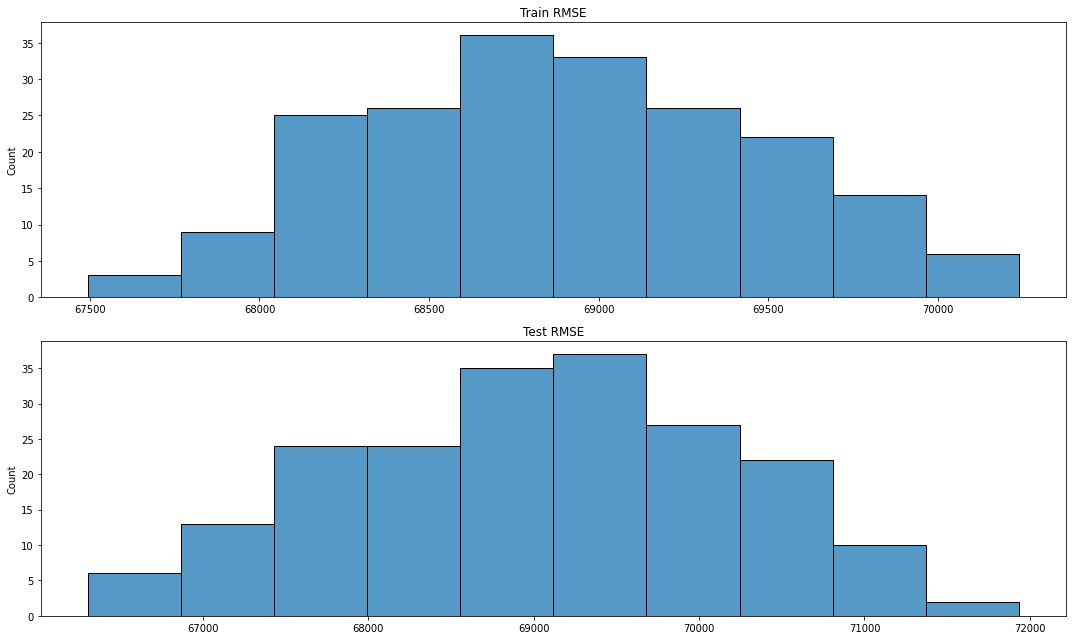

In [ ]:
f, axs = plt.subplots(2, 1, figsize=(15,9))
axs[0].set_title("Train RMSE")
axs[1].set_title("Test RMSE")
sns.histplot(train_RMSE, ax=axs[0]);
sns.histplot(test_RMSE, ax=axs[1]);
f.tight_layout()

In [ ]:
testData = dummify(testData, dummy_list)

In [ ]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          10320 non-null  int64  
 1   longitude                   10320 non-null  float64
 2   latitude                    10320 non-null  float64
 3   housing_median_age          10320 non-null  float64
 4   total_rooms                 10320 non-null  float64
 5   total_bedrooms              10223 non-null  float64
 6   population                  10320 non-null  float64
 7   households                  10320 non-null  float64
 8   median_income               10320 non-null  float64
 9   ocean_proximity_<1H OCEAN   10320 non-null  uint8  
 10  ocean_proximity_INLAND      10320 non-null  uint8  
 11  ocean_proximity_ISLAND      10320 non-null  uint8  
 12  ocean_proximity_NEAR BAY    10320 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  103

In [ ]:
X_real_test = testData.drop(testData.columns[[0]], axis=1)

In [ ]:
X_real_test['total_bedrooms'] = X_real_test['total_bedrooms'].fillna((X_real_test['total_bedrooms'].median()))
X_real_test = standardizeData(X_real_test)
X_real_test.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,1.032000e+04,1.032000e+04,10320.000000,1.032000e+04,1.032000e+04,1.032000e+04,1.032000e+04,1.032000e+04,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000
mean,2.645300e-15,4.980964e-15,28.734496,8.335279e-17,1.031690e-16,-9.500368e-17,2.972429e-17,2.121765e-16,0.442829,0.320058,0.000291,0.108043,0.128779
std,1.000048e+00,1.000048e+00,12.565620,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,0.496745,0.466521,0.017048,0.310449,0.334971
min,-2.375334e+00,-1.432945e+00,1.000000,-1.218987e+00,-1.289443e+00,-1.263754e+00,-1.314879e+00,-1.770671e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.111322e+00,-7.879220e-01,18.000000,-5.504817e-01,-5.678057e-01,-5.633220e-01,-5.712379e-01,-6.937128e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.373890e-01,-6.430255e-01,29.000000,-2.341643e-01,-2.481543e-01,-2.247053e-01,-2.392553e-01,-1.799407e-01,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.722054e-01,9.788809e-01,37.000000,2.467172e-01,2.628036e-01,2.736278e-01,2.812935e-01,4.694756e-01,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.615764e+00,2.960691e+00,52.000000,1.645332e+01,1.195672e+01,3.057157e+01,1.246373e+01,5.872107e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_pred = reg.predict(X_real_test)
y_pred.tolist()

In [ ]:
ans = {'id':testData.id, 'median_house_value': y_pred.tolist()}
df = pd.DataFrame(ans)
df.to_csv('assignment4.csv', index=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df